In [2]:
import math
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from my_ecog_utils import read_with_annotations, get_multitaper_power_bands, get_multitaper_power_bands_narrow

In [3]:
raw = read_with_annotations(115)

Opening raw data file data/115/stimulated_ieeg.fif...
Isotrak not found
    Range : 0 ... 59951 =      0.000 ...   239.804 secs
Ready.


c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:13: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)


Using matplotlib as 2D backend.


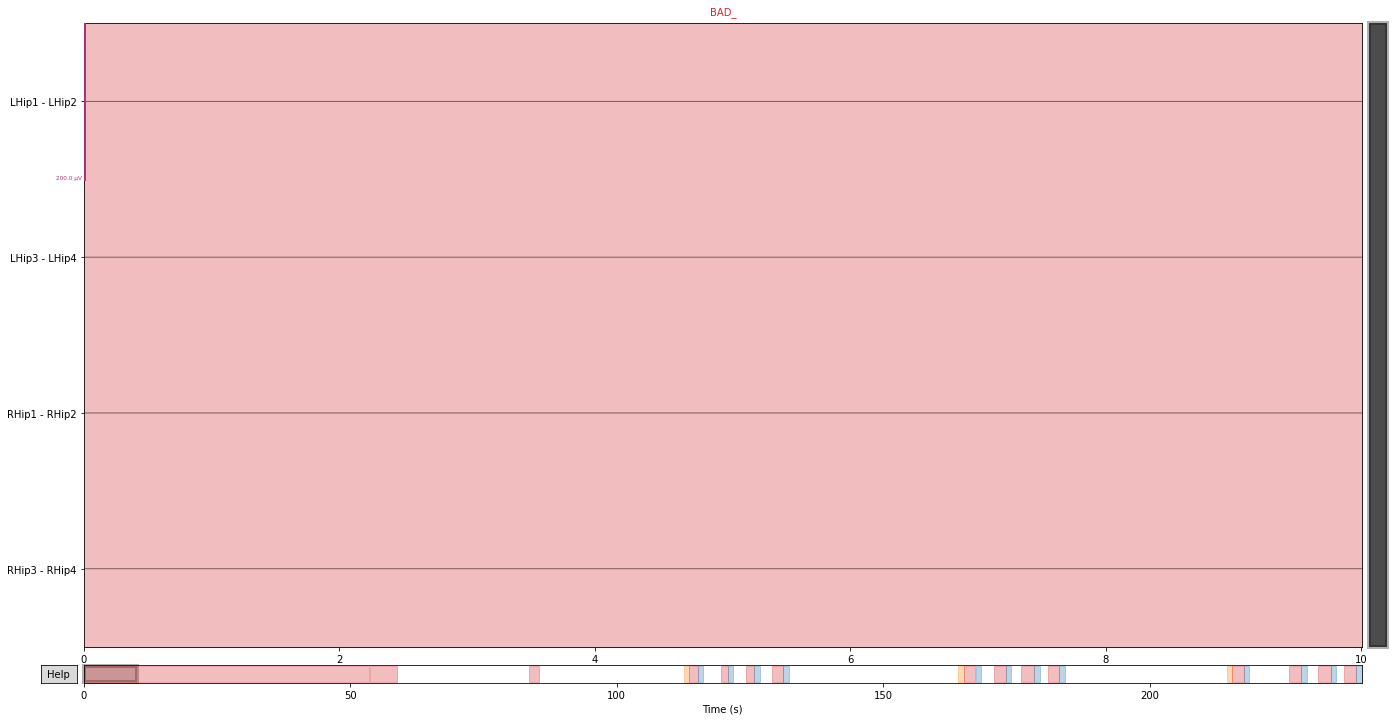

In [4]:
raw.plot()

In [5]:
raw.plot_psd()

Setting 21249 of 59952 (35.44%) samples to NaN, retaining 38703 (64.56%) samples.
Effective window size : 8.192 (s)


C:\Users\seand\AppData\Local\Temp/ipykernel_28464/2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


In [6]:
evts, event_id = mne.events_from_annotations(raw, {'BAD_': 0, 'post_shock': 2, 'pre_shock': 1})
pre_epochs = mne.Epochs(raw, evts, event_id=1, tmin=0, tmax=1, baseline=(0.5,1.0))
post_epochs = mne.Epochs(raw, evts, event_id=2, tmin=0, tmax=1, baseline=(0.5,1.0))

Used Annotations descriptions: ['post_shock', 'pre_shock']
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
12 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [7]:
power_pre, itc = mne.time_frequency.tfr_multitaper(pre_epochs, freqs=pre_freqs[1:], n_cycles = pre_freqs[1:] / 2, picks='LHip3 - LHip4')
power_pre.plot(dB=True, vmin=-225, vmax=-150, title='Pre-Stim')

NameError: name 'pre_freqs' is not defined

In [ ]:
power_post, itc = mne.time_frequency.tfr_multitaper(post_epochs, freqs=pre_freqs[1:], n_cycles = pre_freqs[1:] / 2, picks='LHip3 - LHip4')
power_post.plot(dB=True, vmin=-225, vmax=-150, title='Post-Stim')

[<Figure size 640x480 with 2 Axes>]

In [ ]:
raw.plot()

Traceback (most recent call last):
  File "c:\Users\seand\eeg_proj\venv\lib\site-packages\matplotlib\cbook\__init__.py", line 287, in process
    func(*args, **kwargs)
  File "c:\Users\seand\eeg_proj\venv\lib\site-packages\mne\viz\_mpl_figure.py", line 180, in _close
    super()._close(event)
  File "c:\Users\seand\eeg_proj\venv\lib\site-packages\mne\viz\_mpl_figure.py", line 103, in _close
    self.mne.parent_fig.mne.child_figs.remove(self)
ValueError: list.remove(x): x not in list


In [ ]:
raw.annotations.rename({'BAD_': 'shock'})

<Annotations | 37 segments: post_shock (12), pre_shock (3), shock (15), ...>

In [ ]:
evts, event_id = mne.events_from_annotations(raw, {'shock': 0, 'post_shock': 2, 'pre_shock': 1, 'temp': 3})
test_epochs = mne.Epochs(raw, evts, event_id=0, tmin=-1.0, tmax=2.0, baseline=(-1.0,-0.5))

In [ ]:
power_test, itc = mne.time_frequency.tfr_multitaper(test_epochs, freqs=pre_freqs[1:], n_cycles = pre_freqs[1:] / 2, picks='LHip3 - LHip4')
power_test.plot(dB=True, vmin=-225, vmax=-150, title='Peri-Stim')

c:\Users\seand\eeg_proj\venv\lib\site-packages\mne\time_frequency\tfr.py:538: RuntimeWarning: invalid value encountered in true_divide
  plf += tfr / tfr_abs  # phase


[<Figure size 640x480 with 2 Axes>]

Loading data for 3 events and 251 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\seand\AppData\Local\Temp/ipykernel_35996/1991489676.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd()


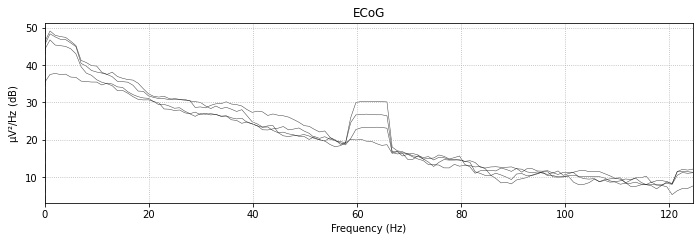

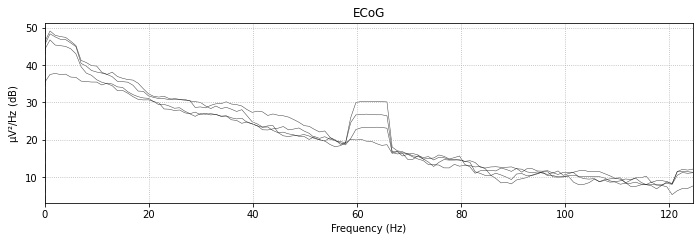

In [ ]:
epochs.plot_psd()

In [ ]:
raw.load_data()
raw.notch_filter(62.5)

Reading 0 ... 59951  =      0.000 ...   239.804 secs...
Setting up band-stop filter from 62 - 63 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 61.84
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 61.59 Hz)
- Upper passband edge: 63.16 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 63.41 Hz)
- Filter length: 1651 samples (6.604 sec)



<Raw | stimulated_ieeg.fif, 4 x 59952 (239.8 s), ~1.8 MB, data loaded>

Setting 21249 of 59952 (35.44%) samples to NaN, retaining 38703 (64.56%) samples.
Effective window size : 8.192 (s)


C:\Users\seand\AppData\Local\Temp/ipykernel_35996/2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


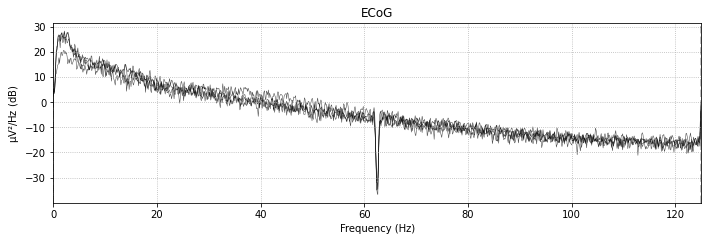

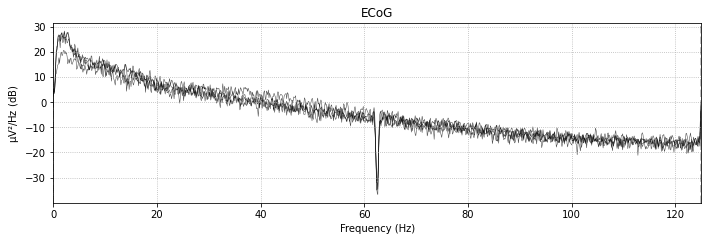

In [ ]:
raw.plot_psd()

Used Annotations descriptions: ['post_shock', 'pre_shock']
Not setting metadata
Not setting metadata
3 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3 events and 251 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\seand\AppData\Local\Temp/ipykernel_35996/509983409.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd()


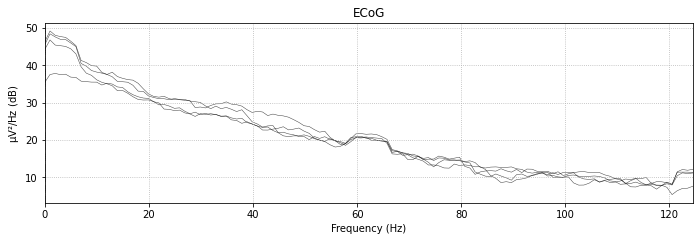

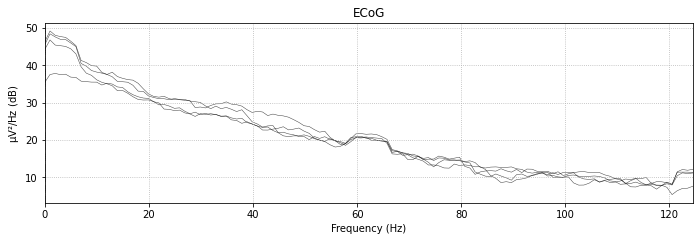

In [ ]:
evts, event_id = mne.events_from_annotations(raw, {'BAD_': 0, 'post_shock': 2, 'pre_shock': 1})
epochs = mne.Epochs(raw, evts, event_id=1, tmin=0, tmax=1, baseline=(0.5,1.0))
epochs.plot_psd()

## Peaks for Short-Term Memory

In [68]:
mne.set_log_level('WARNING')
pre_epochs_master = []
for pt_num in range(110, 116):
    if pt_num == 114:
        continue
    raw = read_with_annotations(pt_num)
    raw.load_data()
    raw.notch_filter(62.5)

    if pt_num == 100:
        raw.rename_channels({'Hip1 - Hip2': 'LHip1 - LHip2', 'Hip3 - Hip4': 'LHip3 - LHip4'})
    elif pt_num == 113:
        raw.rename_channels(lambda s: s.replace('H', 'Hip'))

    evts, event_id = mne.events_from_annotations(raw, {'BAD_': 0, 'post_shock': 2, 'pre_shock': 1})
    epochs = mne.Epochs(raw, evts, event_id=1, tmin=0, tmax=1, baseline=(0.5,1.0))

    # drop segments that overlap with shocks
    # i.e. those that are shorter than 1 second. May change tmax in the future
    epochs.drop_bad()
    print(pt_num, epochs.info['ch_names'])
    pre_epochs_master.append(epochs)

110 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
111 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
112 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
113 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
115 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']


c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:13: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)


In [67]:
post_epochs_master = []
for pt_num in range(110, 116):
    if pt_num == 114:
        continue
    raw = read_with_annotations(pt_num)
    raw.load_data()
    raw.notch_filter(62.5)

    if pt_num == 100:
        raw.rename_channels({'Hip1 - Hip2': 'LHip1 - LHip2', 'Hip3 - Hip4': 'LHip3 - LHip4'})
    elif pt_num == 113:
        raw.rename_channels(lambda s: s.replace('H', 'Hip'))

    evts, event_id = mne.events_from_annotations(raw, {'BAD_': 0, 'post_shock': 2, 'pre_shock': 1})
    epochs = mne.Epochs(raw, evts, event_id=2, tmin=0, tmax=1, baseline=(0.5,1.0))

    # drop segments that overlap with shocks
    # i.e. those that are shorter than 1 second. May change tmax in the future
    epochs.drop_bad()
    print(pt_num, epochs.info['ch_names'])
    post_epochs_master.append(epochs)

110 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
111 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
112 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
113 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
115 ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']


c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:13: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)


TODO does this need to be filtered out? in 112 and 115

C:\Users\seand\AppData\Local\Temp/ipykernel_35996/1229717513.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  pre_epochs_master[4].plot_psd()


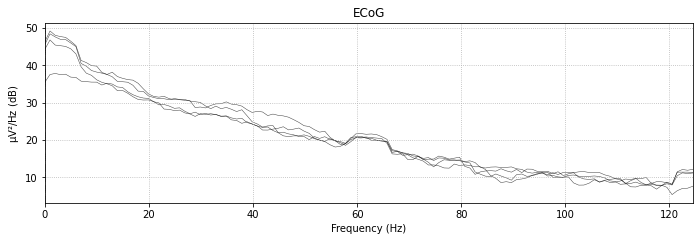

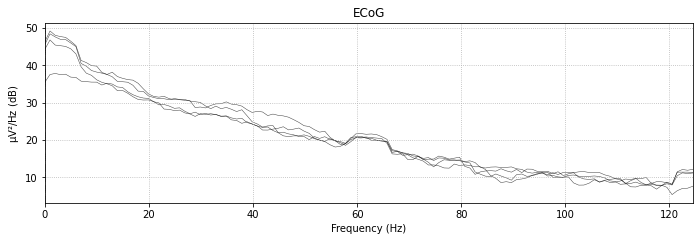

In [ ]:
pre_epochs_master[4].plot_psd()

In [69]:
def local_maxima(arr: np.ndarray, n_samples: int):
    half_width = n_samples // 2
    max_indices = []
    max_mags = []
    for i in range(len(arr)):
        y = arr[i]
        if y >= np.max(arr[max(0, i - half_width):min(len(arr), i + half_width)]):
            max_indices.append(i)
            max_mags.append(y)

    return max_indices, max_mags

In [ ]:
%matplotlib inline

In [70]:
import scipy.stats
from sklearn.linear_model import RANSACRegressor, HuberRegressor

pt_nums = [110, 111, 112, 113, 115]
all_hip_chans = ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
locs_master = np.array([])

current_bands = [(0.1, 3), (14.5, 19.5), (41.5, 46.5), (82.5, 87.5), (101.5, 106.5), (116.5, 121.5)]
def isin_curr_bands(x):
    for lo, hi in current_bands:
        if lo <= x and x <= hi:
            return True
    return False

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12, 8)
fig.suptitle('Average Power Spectral Density for Each Contact')
for i, chan in enumerate(all_hip_chans):
    ax = axs[i // 2, i % 2]
    ax.set_title(chan)

    pre_psds, pre_freqs = mne.time_frequency.psd_multitaper(mne.concatenate_epochs(pre_epochs_master), picks=chan)
    pre_psds = np.log10(pre_psds) - np.log10(1e-12)

    pre_mean = pre_psds.mean(axis=0)[0]
    pre_std = scipy.stats.sem(pre_psds, axis=0)[0]
    # ax.set_title(pt_nums[i])
    pre_handle, = ax.plot(pre_freqs, pre_mean, label='Pre')
    ax.fill_between(pre_freqs, pre_mean - pre_std, pre_mean + pre_std, alpha=0.3)

    post_psds, post_freqs = mne.time_frequency.psd_multitaper(mne.concatenate_epochs(post_epochs_master), picks=chan)
    post_psds = np.log10(post_psds) - np.log10(1e-12)

    post_mean = post_psds.mean(axis=0)[0]
    post_std = scipy.stats.sem(post_psds, axis=0)[0]
    # ax.set_title(pt_nums[i])
    post_handle, = ax.plot(post_freqs, post_mean, label='Post')
    ax.fill_between(post_freqs, post_mean - post_std, post_mean + post_std, alpha=0.3)
    
    # regressor = HuberRegressor(epsilon=20)
    results = scipy.stats.linregress(pre_freqs, np.log(pre_mean))
    b = results.intercept
    m = results.slope

    regression = np.exp(b+m*pre_freqs)
    # regression = np.exp(regressor.predict(pre_freqs.reshape(-1,1)))
    # locs, mags = mne.preprocessing.peak_finder(pre_mean - regression)
    locs, mags = local_maxima(pre_mean - regression, 10)
    ax2 = ax.twinx()
    ax2.plot(pre_mean - regression, c='tab:red')
    ax.plot(regression)
    [ax.axvline(loc, linestyle='--') for loc in locs] # c='blue' if isin_curr_bands(loc) else 'red'
    # for lo, hi in current_bands:
    #     ax.axvspan(lo, hi, alpha=0.3)
    print(locs)
    locs_master = np.append(locs_master, locs)

fig.legend(handles=[pre_handle, post_handle], loc='center right')

[5, 25, 49, 66, 80, 87, 106, 116, 125]
[7, 21, 38, 65, 76, 81, 96, 109, 124]
[5, 25, 33, 50, 60, 74, 95, 123]
[6, 27, 35, 51, 61, 80, 92, 98, 103, 114, 122]


In [89]:
import scipy.stats
from sklearn.linear_model import RANSACRegressor, HuberRegressor

def find_peaks(pt_num, bands):
    # populate pre_epochs_master
    mne.set_log_level('WARNING')
    pre_epochs_master = []
    
    raw = read_with_annotations(pt_num)
    raw.load_data()
    raw.notch_filter(62.5)

    if pt_num == 100:
        raw.rename_channels({'Hip1 - Hip2': 'LHip1 - LHip2', 'Hip3 - Hip4': 'LHip3 - LHip4'})
    elif pt_num == 113:
        raw.rename_channels(lambda s: s.replace('H', 'Hip'))

    evts, event_id = mne.events_from_annotations(raw, {'BAD_': 0, 'post_shock': 2, 'pre_shock': 1})
    epochs = mne.Epochs(raw, evts, event_id=1, tmin=0, tmax=1, baseline=(0.5,1.0))

    # drop segments that overlap with shocks
    # i.e. those that are shorter than 1 second. May change tmax in the future
    epochs.drop_bad()
    # print(pt_num, epochs.info['ch_names'])
    pre_epochs_master.append(epochs)

    # using pre_epochs_master, find peaks in the pre-stim PSD
    all_hip_chans = ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
    locs_master = np.array([])
    peaks_final = [[], [], [], []]

    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(12, 8)
    fig.suptitle('Average Power Spectral Density for Each Contact')
    for i, chan in enumerate(all_hip_chans):
        ax = axs[i // 2, i % 2]
        ax.set_title(chan)

        if chan not in epochs.info['ch_names']:
            # print(epochs.info['ch_names'])
            continue

        pre_psds, pre_freqs = mne.time_frequency.psd_multitaper(mne.concatenate_epochs(pre_epochs_master), picks=chan)
        pre_psds = np.log10(pre_psds) - np.log10(1e-12)

        pre_mean = pre_psds.mean(axis=0)[0]
        pre_std = scipy.stats.sem(pre_psds, axis=0)[0]
        # ax.set_title(pt_nums[i])
        pre_handle, = ax.plot(pre_freqs, pre_mean, label='Pre')
        ax.fill_between(pre_freqs, pre_mean - pre_std, pre_mean + pre_std, alpha=0.3)
        
        # regressor = HuberRegressor(epsilon=20)
        results = scipy.stats.linregress(pre_freqs, np.log(pre_mean))
        b = results.intercept
        m = results.slope

        regression = np.exp(b+m*pre_freqs)
        locs, mags = local_maxima(pre_mean - regression, 8)
        ax2 = ax.twinx()
        ax2.plot(pre_mean - regression, c='tab:red')
        ax.plot(regression, c='tab:green')
        [ax.axvline(loc, linestyle='--') for loc in locs] # c='blue' if isin_curr_bands(loc) else 'red'
        # print(locs)
        locs_master = np.append(locs_master, locs)

        max_x = -1
        max_y = -1
        for lo, hi in bands:
            # check every peak that we've found to see if it's in the range of this band
            for peak_x in locs:
                if peak_x >= lo and peak_x < hi:
                    # magnitude of the peak is defined as height of mean pre-stim PSD minus regression
                    peak_mag = pre_mean[np.argmin(np.abs(pre_freqs - peak_x))] - np.exp(b+m*peak_x)
                    if peak_mag >= max_y:
                        # print(f"We like the peak {peak_x} for band {lo}-{hi}")
                        max_x = peak_x
                        max_y = peak_mag
            # if there are no peaks in the range, then just use the frequency with the highest residual,
            # which should be either lo or hi since it's roughly montonic
            if max_x == -1:
                lo_mag = pre_mean[np.argmin(np.abs(pre_freqs - lo))] - np.exp(b+m*lo)
                hi_mag = pre_mean[np.argmin(np.abs(pre_freqs - hi))] - np.exp(b+m*hi)
                if lo_mag > hi_mag:
                    max_x = lo
                    max_y = lo_mag
                else:
                    max_x = hi
                    max_y = hi_mag

            peaks_final[i].append(max_x)
            # reset for next band
            max_x = -1
            max_y = -1
            

    fig.legend(handles=[pre_handle, post_handle], loc='center right')
    return peaks_final

c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:13: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)


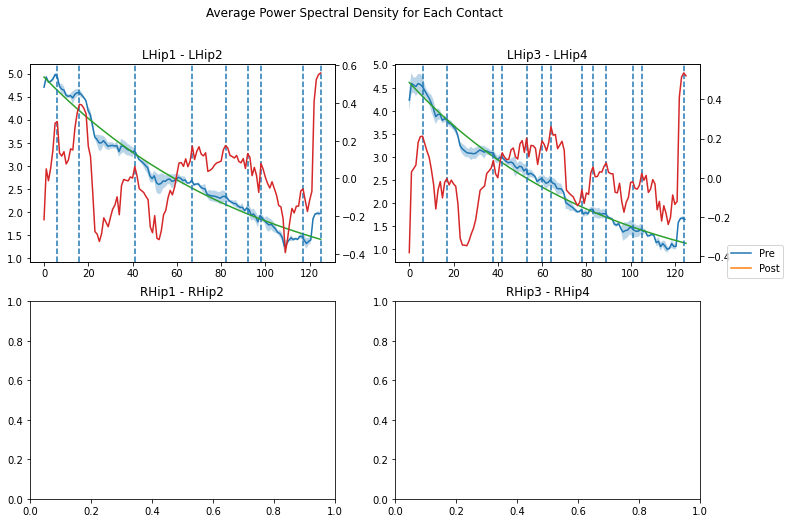

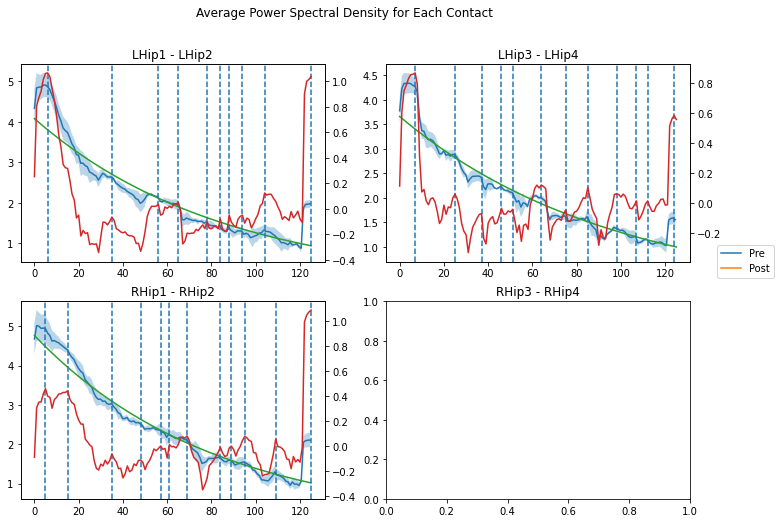

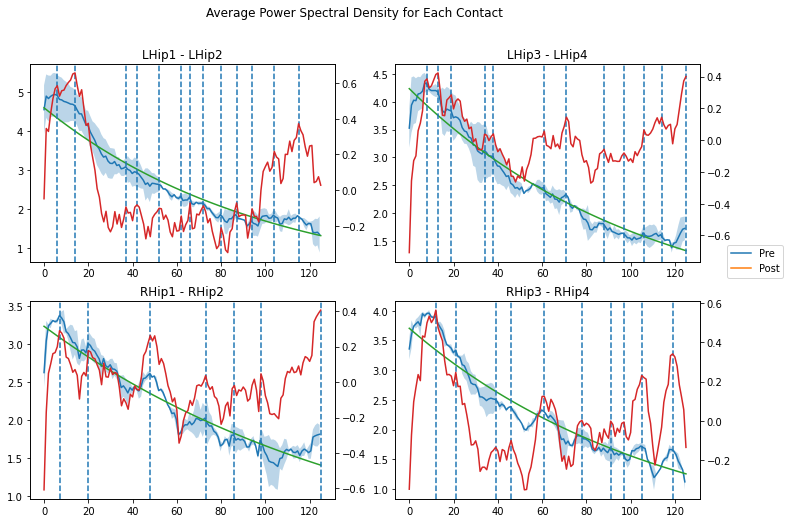

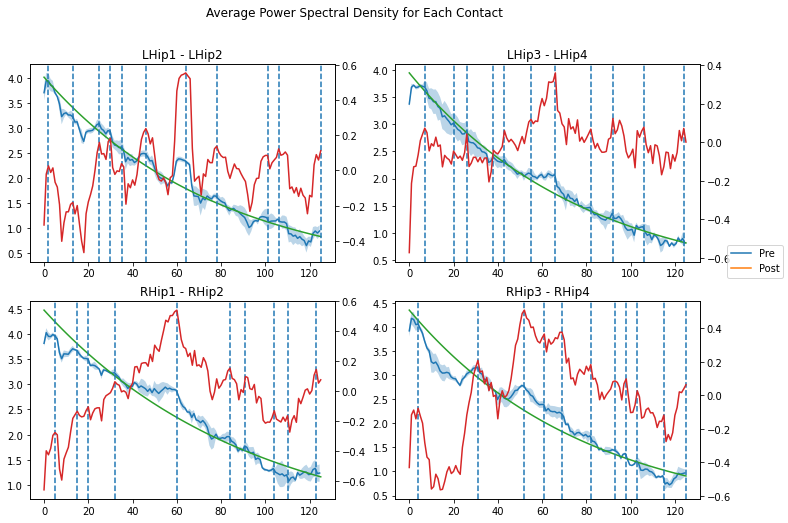

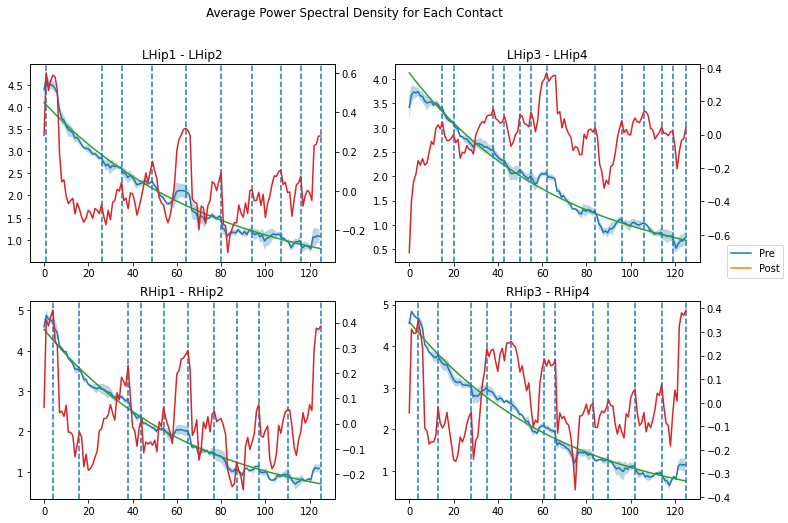

In [110]:
broad_bands = [(0.1, 3), (4, 7), (8, 12), (13, 30), (40, 57), (67, 80), (81, 100), (101, 120)]
peaks = {}
for pt_num in [100, 109, 110, 111, 112, 113, 115]:
    peaks[pt_num] = find_peaks(pt_num, broad_bands)

In [111]:
all_hip_chans = ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
dict(zip(all_hip_chans, peaks[100]))

{'LHip1 - LHip2': [3, 6, 12, 16, 41, 67, 82, 117],
 'LHip3 - LHip4': [3, 6, 8, 17, 53, 78, 89, 105],
 'RHip1 - RHip2': [],
 'RHip3 - RHip4': []}

In [112]:
peaks_dict = {pt_num: dict(zip(all_hip_chans, peaks[pt_num])) for pt_num in peaks}

In [113]:
df = pd.DataFrame([{'ID': pt_num, 'Channel': chan, 'Frequencies': peaks_dict[pt_num][chan]} for chan in peaks_dict[pt_num] for pt_num in peaks_dict])
df.to_csv('individual_peaks.csv', index=False)
df

ID        Channel                       Frequencies
0   100  LHip1 - LHip2   [3, 6, 12, 16, 41, 67, 82, 117]
1   109  LHip1 - LHip2    [3, 6, 8, 13, 56, 78, 88, 104]
2   110  LHip1 - LHip2    [3, 6, 8, 23, 50, 79, 96, 116]
3   111  LHip1 - LHip2   [3, 6, 12, 14, 42, 72, 87, 115]
4   112  LHip1 - LHip2  [2, 4, 12, 25, 46, 78, 100, 106]
5   113  LHip1 - LHip2    [3, 6, 8, 16, 55, 78, 95, 119]
6   115  LHip1 - LHip2    [1, 4, 8, 26, 49, 80, 94, 107]
7   100  LHip3 - LHip4    [3, 6, 8, 17, 53, 78, 89, 105]
8   109  LHip3 - LHip4    [3, 7, 8, 25, 46, 75, 85, 107]
9   110  LHip3 - LHip4    [3, 7, 8, 21, 54, 78, 97, 110]
10  111  LHip3 - LHip4    [3, 7, 8, 13, 57, 71, 88, 114]
11  112  LHip3 - LHip4    [3, 7, 8, 26, 55, 67, 92, 106]
12  113  LHip3 - LHip4    [3, 6, 8, 13, 49, 75, 92, 109]
13  115  LHip3 - LHip4   [3, 4, 12, 15, 55, 67, 96, 106]
14  100  RHip1 - RHip2                                []
15  109  RHip1 - RHip2   [3, 5, 12, 15, 48, 69, 95, 109]
16  110  RHip1 - RHip2    [3, 6, 8, 26, 49, 80, 98, 118]
17  111  RHip1 - RHip2    [3, 7, 8, 20, 48, 73, 98, 120]
18  112  RHip1 - RHip2   [3, 5, 12, 20, 57, 67, 84, 104]
19  113  RHip1 - RHip2   [3, 7, 10, 22, 48, 79, 96, 109]
20  115  RHip1 - RHip2    [3, 4, 8, 16, 54, 77, 97, 110]
21  100  RHip3 - RHip4                                []
22  109  RHip3 - RHip4                                []
23  110  RHip3 - RHip4   [3, 7, 10, 13, 48, 76, 82, 117]
24  111  RHip3 - RHip4   [3, 7, 12, 21, 46, 78, 91, 119]
25  112  RHip3 - RHip4    [3, 4, 8, 30, 52, 69, 82, 103]
26  113  RHip3 - RHip4   [3, 7, 12, 14, 56, 78, 99, 119]
27  115  RHip3 - RHip4    [3, 4, 8, 13, 46, 80, 90, 114]

In [71]:
plt.hist(locs_master, bins=40)

(array([4., 0., 0., 0., 0., 1., 2., 1., 0., 1., 1., 1., 0., 0., 1., 2., 0.,
        0., 2., 0., 2., 0., 0., 2., 0., 3., 0., 1., 0., 1., 2., 1., 1., 1.,
        1., 0., 1., 1., 0., 4.]),
 array([  5.,   8.,  11.,  14.,  17.,  20.,  23.,  26.,  29.,  32.,  35.,
         38.,  41.,  44.,  47.,  50.,  53.,  56.,  59.,  62.,  65.,  68.,
         71.,  74.,  77.,  80.,  83.,  86.,  89.,  92.,  95.,  98., 101.,
        104., 107., 110., 113., 116., 119., 122., 125.]),
 <BarContainer object of 40 artists>)

## T test for individual frequencies

In [ ]:
import scipy.stats

pt_nums = [110, 111, 112, 113, 115]
all_hip_chans = ['LHip1 - LHip2', 'LHip3 - LHip4', 'RHip1 - RHip2', 'RHip3 - RHip4']
locs_master = np.array([])

pvals = []
bands = [(0.1, 3), (4,7), (8,12), (13,30), (40, 60), (60, 80), (80, 100), (100, 120)]
band_labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'GammaLow', 'GammaMed', 'GammaHigh', 'GammaXHigh']
for i, chan in enumerate(all_hip_chans):
    curr = {'Channel': chan}
    for j, (lo, hi) in enumerate(bands):
        pre_psds, pre_freqs = mne.time_frequency.psd_multitaper(mne.concatenate_epochs(pre_epochs_master), picks=chan, fmin=lo, fmax=hi)
        pre_psds = np.log10(pre_psds) - np.log10(1e-12)

        post_psds, post_freqs = mne.time_frequency.psd_multitaper(mne.concatenate_epochs(post_epochs_master), picks=chan, fmin=lo, fmax=hi)
        post_psds = np.log10(post_psds) - np.log10(1e-12)

        pval = scipy.stats.ttest_ind(pre_psds.flatten(), post_psds.flatten()).pvalue
        curr[band_labels[j]] = pval
    pvals.append(curr)

In [ ]:
ttest_pvals = pd.DataFrame(pvals).set_index('Channel')
ttest_pvals

Delta     Theta     Alpha      Beta  GammaLow  GammaMed  \
Channel                                                                     
LHip1 - LHip2  0.205046  0.074867  0.703261  0.003912  0.133357  0.004624   
LHip3 - LHip4  0.006577  0.591980  0.877726  0.075215  0.150105  0.000302   
RHip1 - RHip2  0.061293  0.123588  0.111038  0.000506  0.353375  0.000778   
RHip3 - RHip4  0.000031  0.000405  0.032690  0.000007  0.001139  0.586272   

               GammaHigh  GammaXHigh  
Channel                               
LHip1 - LHip2   0.089233    0.250292  
LHip3 - LHip4   0.553900    0.263231  
RHip1 - RHip2   0.000800    0.002875  
RHip3 - RHip4   0.022368    0.000340

In [ ]:
from stats_pipeline import fdr_bh

In [ ]:
ttest_pvals[ttest_pvals < 0.05]

Delta     Theta    Alpha      Beta  GammaLow  GammaMed  \
Channel                                                                    
LHip1 - LHip2       NaN       NaN      NaN  0.003912       NaN  0.004624   
LHip3 - LHip4  0.006577       NaN      NaN       NaN       NaN  0.000302   
RHip1 - RHip2       NaN       NaN      NaN  0.000506       NaN  0.000778   
RHip3 - RHip4  0.000031  0.000405  0.03269  0.000007  0.001139       NaN   

               GammaHigh  GammaXHigh  
Channel                               
LHip1 - LHip2        NaN         NaN  
LHip3 - LHip4        NaN         NaN  
RHip1 - RHip2   0.000800    0.002875  
RHip3 - RHip4   0.022368    0.000340

In [ ]:
new_tp = fdr_bh(ttest_pvals)
new_tp[new_tp < 0.05]

Delta    Theta  Alpha      Beta  GammaLow  GammaMed  \
Channel                                                                 
LHip1 - LHip2       NaN      NaN    NaN  0.011380       NaN  0.012331   
LHip3 - LHip4  0.016189      NaN    NaN       NaN       NaN  0.002590   
RHip1 - RHip2       NaN      NaN    NaN  0.002699       NaN  0.003200   
RHip3 - RHip4  0.000495  0.00259    NaN  0.000225  0.004048       NaN   

               GammaHigh  GammaXHigh  
Channel                               
LHip1 - LHip2        NaN         NaN  
LHip3 - LHip4        NaN         NaN  
RHip1 - RHip2     0.0032    0.009201  
RHip3 - RHip4        NaN    0.002590

## Peaks for Delayed Memory

In [ ]:
mne.set_log_level('WARNING')
raw_controls_master = []
pts_w_control_and_stim = [103, 106, 109, 110, 111, 112, 113, 115]
for pt_num in pts_w_control_and_stim:
    raw = read_with_annotations(pt_num, stim='control', annotations='manual')
    raw.load_data()
    raw.notch_filter(62.5)

    if pt_num == 100:
        raw.rename_channels({'Hip1 - Hip2': 'LHip1 - LHip2', 'Hip3 - Hip4': 'LHip3 - LHip4'})
    if pt_num == 103:
        raw.rename_channels(lambda s: 'L' + s)
    if pt_num == 106:
        raw.rename_channels(lambda s: 'L' + s.upper())
    elif pt_num == 108:
        raw.rename_channels(lambda s: s.replace('HIP', 'Hip'))
    elif pt_num == 113:
        raw.rename_channels(lambda s: s.replace('H', 'Hip'))
    raw_controls_master.append(raw)

No annotations found for pt 103
No annotations found for pt 106
No annotations found for pt 109
No annotations found for pt 111


In [ ]:
raw_stims_master = []
pts_w_control_and_stim = [103, 106, 109, 110, 111, 112, 113, 115]
for pt_num in pts_w_control_and_stim:
    raw = read_with_annotations(pt_num, stim='stimulated')
    raw.load_data()
    # raw.notch_filter(62.5)

    if pt_num == 100:
        raw.rename_channels({'Hip1 - Hip2': 'LHip1 - LHip2', 'Hip3 - Hip4': 'LHip3 - LHip4'})
    if pt_num == 103:
        raw.rename_channels(lambda s: 'L' + s)
    if pt_num == 106:
        raw.rename_channels(lambda s: 'L' + s.upper())
    elif pt_num == 108:
        raw.rename_channels(lambda s: s.replace('HIP', 'Hip'))
    elif pt_num == 113:
        raw.rename_channels(lambda s: s.replace('H', 'Hip'))
    raw_stims_master.append(raw)

c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:11: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)


In [ ]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(14, 8)
for i in range(len(raw_controls_master)):
    try:
        pre_psds, pre_freqs = mne.time_frequency.psd_welch(raw_controls_master[i], picks='LHip3 - LHip4')
    except ValueError:
        continue
    pre_psds = np.log10(pre_psds) - np.log10(1e-14)

    ax = axs[i//4,i%4]
    ax.set_title(pts_w_control_and_stim[i])
    ax.plot(pre_freqs, pre_psds[0])

    post_psds, post_freqs = mne.time_frequency.psd_welch(raw_stims_master[i], picks='LHip3 - LHip4')
    post_psds = np.log10(post_psds) - np.log10(1e-14)

    ax.set_title(pts_w_control_and_stim[i])
    ax.plot(post_freqs, post_psds[0])
    
    results = scipy.stats.linregress(pre_freqs, np.log(pre_psds[0]))
    b = results.intercept
    m = results.slope

    regression = np.exp(b+m*pre_freqs)
    locs, mags = mne.preprocessing.peak_finder(pre_psds[0] - regression)
    [ax.axvline(loc, linestyle='--') for loc in locs]
    print(locs)
    # regressor = HuberRegressor(epsilon=20)
    results = scipy.stats.linregress(pre_freqs, np.log(pre_psds[0]))
    b = results.intercept
    m = results.slope

    regression = np.exp(b+m*pre_freqs)
    # regression = np.exp(regressor.predict(pre_freqs.reshape(-1,1)))
    # locs, mags = mne.preprocessing.peak_finder(pre_mean - regression)
    locs, mags = local_maxima(pre_psds[0] - regression, 20)
    ax2 = ax.twinx()
    ax2.plot(pre_psds[0] - regression, c='tab:red')
    ax.plot(regression)
    [ax.axvline(loc, linestyle='--') for loc in locs] # c='blue' if isin_curr_bands(loc) else 'red'
    # for lo, hi in current_bands:
    #     ax.axvspan(lo, hi, alpha=0.3)
    print(locs)
    locs_master = np.append(locs_master, locs)

[  5 128]
[5, 22, 106, 128]
[ 18 124]
[18, 49, 60, 124]
[  8 124]
[8, 40, 55, 68, 124]
[ 10 128]
[10, 39, 58, 70, 80, 128]
[ 16 100]
[16, 44, 80, 100, 124]
[128]
[11, 41, 57, 102, 115, 128]
